In [71]:
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder

In [72]:
col_names = ["1", "2", "3", "4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31","32"]
df=pd.read_csv("D:\\DATA_science\\DATA_science assignment\\Association_Rule\\groceries.csv",names=col_names)

In [73]:
df.head(1218)  ##Max no. of columns are 32. We can see it in row no. 1218

,1,2,3,4,5,6,7,8,9,10,...,23,24,25,26,27,28,29,30,31,32
0,citrus fruit,semi-finished bread,margarine,ready soups,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tropical fruit,yogurt,coffee,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,whole milk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,pip fruit,yogurt,cream cheese,meat spreads,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,other vegetables,whole milk,condensed milk,long life bakery product,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1213,citrus fruit,cake bar,baby cosmetics,shopping bags,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1214,fruit/vegetable juice,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1215,beef,tropical fruit,whole milk,ice cream,cat food,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1216,frankfurter,sausage,liver loaf,ham,chicken,beef,citrus fruit,tropical fruit,root vegetables,other vegetables,...,roll products,flour,pasta,margarine,specialty fat,sugar,soups,skin care,hygiene articles,candles


In [74]:
df=pd.get_dummies(df)
df

,1_Instant food products,1_UHT-milk,1_abrasive cleaner,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,...,28_chocolate,28_hygiene articles,28_napkins,28_sugar,29_cooking chocolate,29_house keeping products,29_soups,30_skin care,31_hygiene articles,32_candles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9831,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9833,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
df.shape

(9835, 2201)

In [77]:
df.groupby(['32_candles']).count()

,1_Instant food products,1_UHT-milk,1_abrasive cleaner,1_artif. sweetener,1_baby cosmetics,1_bags,1_baking powder,1_bathroom cleaner,1_beef,1_berries,...,27_specialty fat,28_chocolate,28_hygiene articles,28_napkins,28_sugar,29_cooking chocolate,29_house keeping products,29_soups,30_skin care,31_hygiene articles
32_candles,,,,,,,,,,,,,,,,,,,,,
0,9834,9834,9834,9834,9834,9834,9834,9834,9834,9834,...,9834,9834,9834,9834,9834,9834,9834,9834,9834,9834
1,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9835 entries, 0 to 9834
Columns: 2201 entries, 1_Instant food products to 32_candles
dtypes: uint8(2201)
memory usage: 20.6 MB


In [53]:
frequent_itemset=apriori(df,min_support=0.05,use_colnames=True)
frequent_itemset

,support,itemsets
0,0.058973,(1_frankfurter)
1,0.083884,(1_sausage)
2,0.072903,(1_whole milk)
3,0.055923,(2_other vegetables)
4,0.066497,(2_whole milk)
5,0.051449,(3_whole milk)


In [57]:
frequent_itemset_1=apriori(df,min_support=0.01,use_colnames=True)
frequent_itemset_1

,support,itemsets
0,0.030910,(1_beef)
1,0.012303,(1_berries)
2,0.018099,(1_bottled beer)
3,0.017285,(1_bottled water)
4,0.031520,(1_canned beer)
...,...,...
81,0.014032,"(1_other vegetables, 2_whole milk)"
82,0.018302,"(2_other vegetables, 3_whole milk)"
83,0.012506,"(2_root vegetables, 3_other vegetables)"
84,0.017285,"(3_other vegetables, 4_whole milk)"


In [69]:
rules=association_rules(frequent_itemset,metric='confidence',min_threshold=0.20)    ## It gives output for min_confidence=
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_tropical fruit),(1_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
1,(1_citrus fruit),(2_tropical fruit),0.046060,0.036096,0.011591,0.251656,6.971924,0.009929,1.288049
2,(2_sausage),(1_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
3,(1_other vegetables),(2_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575
4,(2_whole milk),(1_other vegetables),0.066497,0.046772,0.014032,0.211009,4.511468,0.010921,1.208161
5,(2_other vegetables),(3_whole milk),0.055923,0.051449,0.018302,0.327273,6.361121,0.015425,1.410008
6,(3_whole milk),(2_other vegetables),0.051449,0.055923,0.018302,0.355731,6.361121,0.015425,1.465347
7,(2_root vegetables),(3_other vegetables),0.038943,0.042196,0.012506,0.321149,7.610840,0.010863,1.410919
8,(3_other vegetables),(2_root vegetables),0.042196,0.038943,0.012506,0.296386,7.610840,0.010863,1.365886
9,(3_other vegetables),(4_whole milk),0.042196,0.032028,0.017285,0.409639,12.789826,0.015934,1.639625


In [64]:
rules=association_rules(frequent_itemset_1,metric='confidence',min_threshold=0.30)    ## It gives output for min_confidence=70%
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(2_tropical fruit),(1_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
1,(2_sausage),(1_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
2,(1_other vegetables),(2_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575
3,(2_other vegetables),(3_whole milk),0.055923,0.051449,0.018302,0.327273,6.361121,0.015425,1.410008
4,(3_whole milk),(2_other vegetables),0.051449,0.055923,0.018302,0.355731,6.361121,0.015425,1.465347
5,(2_root vegetables),(3_other vegetables),0.038943,0.042196,0.012506,0.321149,7.610840,0.010863,1.410919
6,(3_other vegetables),(4_whole milk),0.042196,0.032028,0.017285,0.409639,12.789826,0.015934,1.639625
7,(4_whole milk),(3_other vegetables),0.032028,0.042196,0.017285,0.539683,12.789826,0.015934,2.080746
8,(5_whole milk),(4_other vegetables),0.015150,0.025826,0.010574,0.697987,27.026370,0.010183,3.225598
9,(4_other vegetables),(5_whole milk),0.025826,0.015150,0.010574,0.409449,27.026370,0.010183,1.667679


In [65]:
rules.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
9,(4_other vegetables),(5_whole milk),0.025826,0.015150,0.010574,0.409449,27.026370,0.010183,1.667679
8,(5_whole milk),(4_other vegetables),0.015150,0.025826,0.010574,0.697987,27.026370,0.010183,3.225598
1,(2_sausage),(1_frankfurter),0.010066,0.058973,0.010066,1.000000,16.956897,0.009472,inf
7,(4_whole milk),(3_other vegetables),0.032028,0.042196,0.017285,0.539683,12.789826,0.015934,2.080746
6,(3_other vegetables),(4_whole milk),0.042196,0.032028,0.017285,0.409639,12.789826,0.015934,1.639625
5,(2_root vegetables),(3_other vegetables),0.038943,0.042196,0.012506,0.321149,7.610840,0.010863,1.410919
0,(2_tropical fruit),(1_citrus fruit),0.036096,0.046060,0.011591,0.321127,6.971924,0.009929,1.405181
3,(2_other vegetables),(3_whole milk),0.055923,0.051449,0.018302,0.327273,6.361121,0.015425,1.410008
4,(3_whole milk),(2_other vegetables),0.051449,0.055923,0.018302,0.355731,6.361121,0.015425,1.465347
2,(1_other vegetables),(2_whole milk),0.046772,0.066497,0.014032,0.300000,4.511468,0.010921,1.333575


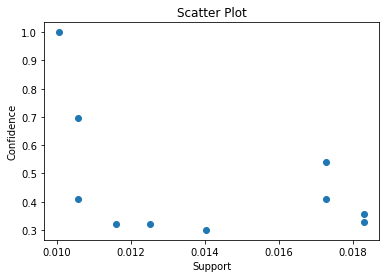

In [66]:
from matplotlib import pyplot as plt
support=rules.iloc[:,4]
confidence=rules.iloc[:,5]
plt.scatter(support,confidence)
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Scatter Plot')
plt.show()

C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

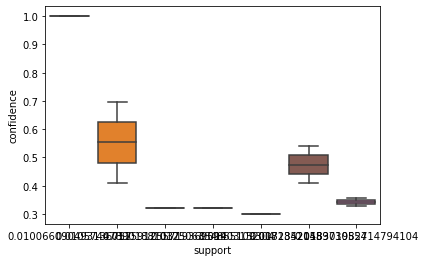

In [67]:
import seaborn as sns
sns.boxplot(support,confidence,data=rules)